# Feature Detection

#### The SIFT & SURF algorithms are patented by their respective creators, and while they are free to use in academic and research settings, you should technically be obtaining a license/permission from the creators if you are using them in a commercial (i.e. for-profit) application.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('input.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## SIFT



In [3]:
#Create SIFT Feature Detector object
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()


Number of keypoints Detected:  605


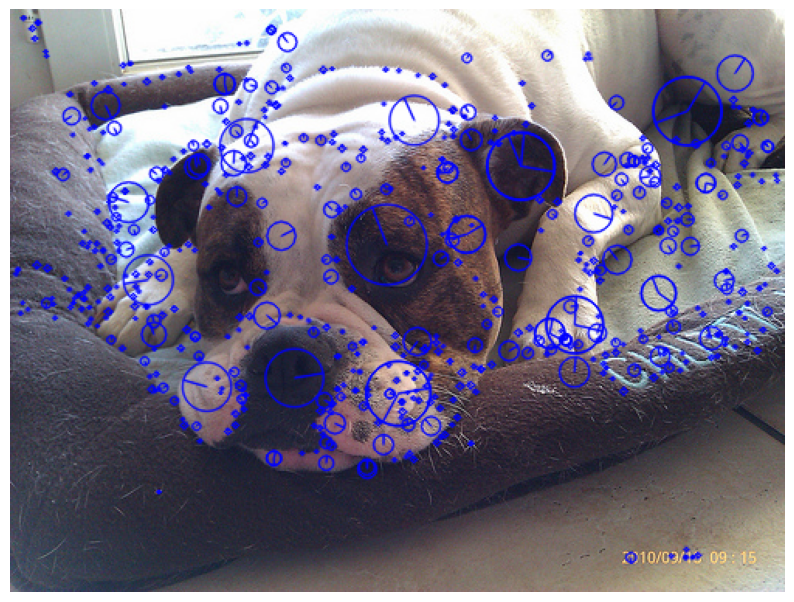

In [4]:
#Detect key points
keypoints_sift, des_sift = sift.detectAndCompute(gray, None)
print("Number of keypoints Detected: ", len(keypoints_sift))

# Draw rich key points on input image
img2 = cv2.drawKeypoints(image, keypoints_sift, outImage = None, color=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [5]:
#Print the keypoints x, y, scale/size, angle, octave

pts = np.array([key_point.pt for key_point in keypoints_sift]).reshape(-1, 2)
scales = np.array([key_point.size for key_point in keypoints_sift]).reshape(-1, 1)
orientations = np.array([key_point.angle for key_point in keypoints_sift]).reshape(-1, 1)
responses = np.array([key_point.response for key_point in keypoints_sift]).reshape(-1, 1)
octaves = np.array([key_point.octave for key_point in keypoints_sift]).reshape(-1, 1)

print(pts.shape,scales.shape,orientations.shape,responses.shape,octaves.shape)

# If you want to print as a list
#index = []
#for point in keypoints_sift:
#    temp = (point.pt, point.size, point.angle, point.response, point.octave, 
#        point.class_id) 
#    index.append(temp)
    

(605, 2) (605, 1) (605, 1) (605, 1) (605, 1)


## FAST


Number of keypoints Detected:  92


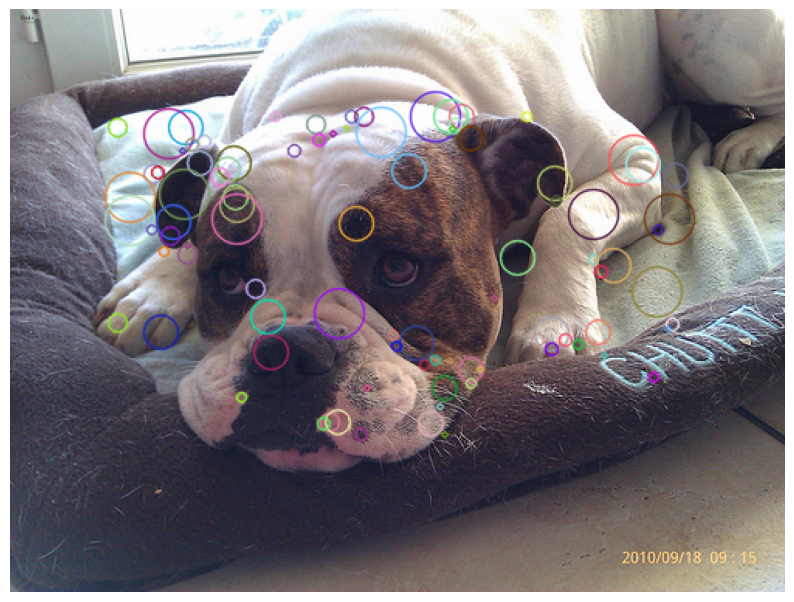

In [6]:
# Create FAST Detector object
fast = cv2.xfeatures2d.StarDetector_create()

# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints = fast.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
img2 = cv2.drawKeypoints(image, keypoints, outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [7]:
#Print the keypoints x, y, scale/size, angle, octave

pts = np.array([key_point.pt for key_point in keypoints]).reshape(-1, 2)
scales = np.array([key_point.size for key_point in keypoints]).reshape(-1, 1)
orientations = np.array([key_point.angle for key_point in keypoints]).reshape(-1, 1)
responses = np.array([key_point.response for key_point in keypoints]).reshape(-1, 1)
octaves = np.array([key_point.octave for key_point in keypoints]).reshape(-1, 1)
print(pts.shape,scales.shape,orientations.shape,responses.shape,octaves.shape)

## BRIEF


Number of keypoints Detected:  92


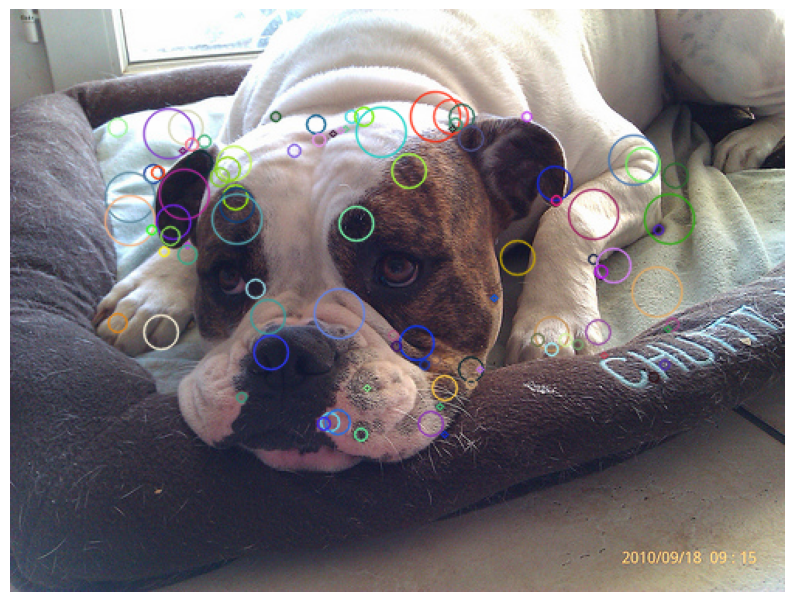

In [8]:
# Create FAST detector object
fast = cv2.xfeatures2d.StarDetector_create()


# Create BRIEF extractor object
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Determine key points
keypoints = fast.detect(gray, None)

# Obtain descriptors and new final keypoints using BRIEF
keypoints, descriptors = brief.compute(gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
img2 = cv2.drawKeypoints(image, keypoints,outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                                    
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## Oriented FAST and Rotated BRIEF (ORB)


Number of keypoints Detected:  500


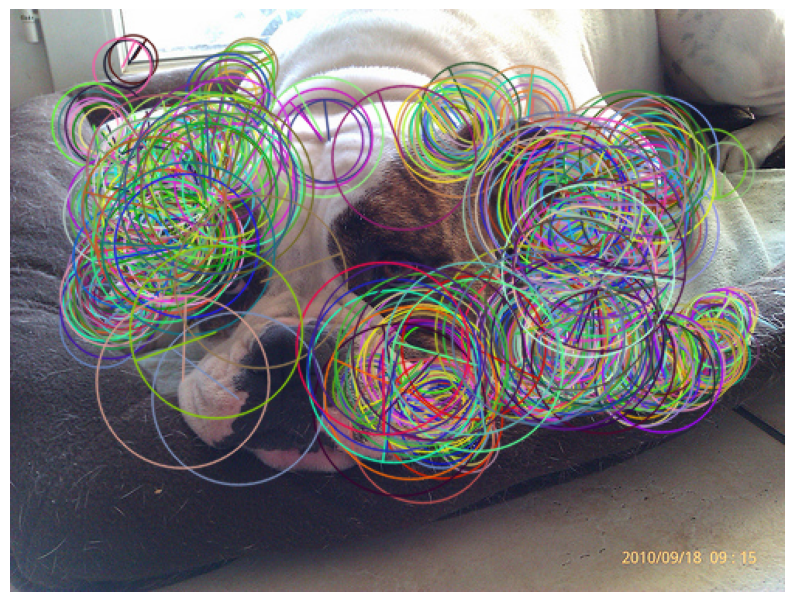

In [9]:
# Create ORB object, we can specify the number of key points we desire
orb = cv2.ORB_create()

# Determine key points
keypoints = orb.detect(gray, None)

# Obtain the descriptors
keypoints, descriptors = orb.compute(gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
img2 = cv2.drawKeypoints(image, keypoints, outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [10]:
print(keypoints_sift[0].size)

2.1075994968414307


## SURF


#Create SURF Feature Detector object -- have to install with pip
surf = cv2.xfeatures2d.SURF_create()#cv2.SURF_create()

# Only features, whose hessian is larger than hessianThreshold are retained by the detector
surf.hessianThreshold = 500
keypoints, descriptors = surf.detectAndCompute(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich key points on input image
img2 = cv2.drawKeypoints(image, keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))